# Predictive Modeling Example

## Step 1: Import the libraries we will use in this notebook

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1) # set this to ensure the results are repeatable. 

## Step 2 : Let's define our relationship to the data

In [67]:
b1 = 30.5 # slope for x
b0 = 20   # y intercept

## Step 3 : Now, Let us create the sample size that we will synthesize

In [68]:
sample_size = 1000

We need to create a set of X (input) values. We could simply create a linear sequence...

In [69]:
x_mean = 100
x_stdev = 10
X = np.round(np.random.normal(x_mean, x_stdev, sample_size),2)

Let us now generate our y value for our hidden model

In [70]:
y = b0 + b1 * np.sin(X)

Now, let us see what our model looks like without noise

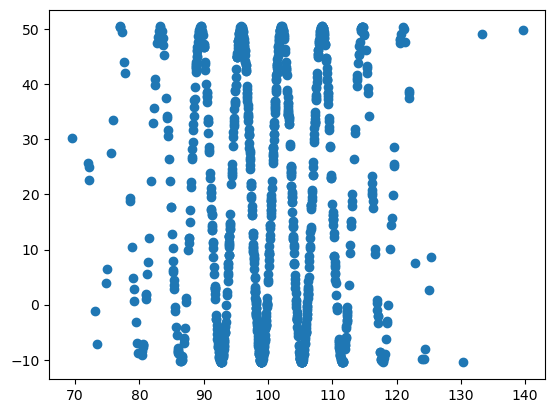

In [71]:
plt.scatter(X, y)
plt.show()

## Step 4: Add some random noise to 'hide' the model

In [72]:
e_mean = 0
e_stdev = 15
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
Y = y + e

## Step 5: Explore the resulting synthesized data

Let us now look at the data and the noise together

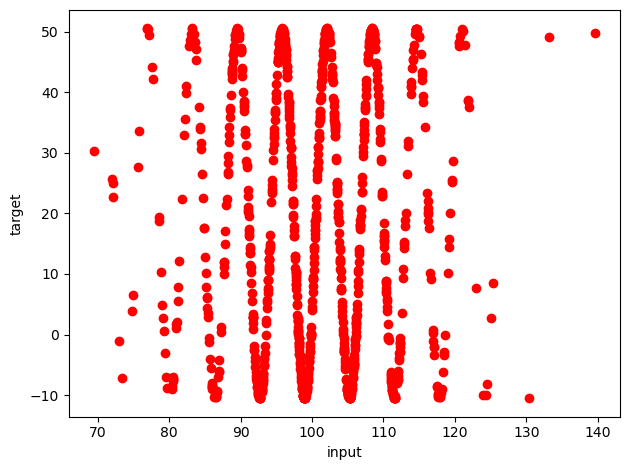

In [73]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 6 : Now let us put all the data into a data frame

In [74]:
df = pd.DataFrame({'input': X, 'target': Y})
df

,input,target
0,116.24,17.667310
1,93.88,-27.456104
2,94.72,41.493376
3,89.27,44.572199
4,108.65,26.764894
...,...,...
995,98.84,-7.450047
996,77.23,57.877196
997,99.30,-22.575732
998,103.54,33.741176


## Step 7: Save the data frame contents to a csv

In [75]:
df.to_csv('./data/error_inc.csv', index=False)

# Now, we have the data that is needed to run the model. Let us see if the model performs well for this set of data

## Step 8: Load the given data that we will model

In [76]:
df = pd.read_csv('./data/error_inc.csv')

df.head(3)

,input,target
0,116.24,17.667310
1,93.88,-27.456104
2,94.72,41.493376


In [77]:
df.shape

(1000, 2)

Seperate out the input m(X) and the target (y)

In [78]:
X=df[['input']]
y=df[['target']]

## Step 9: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

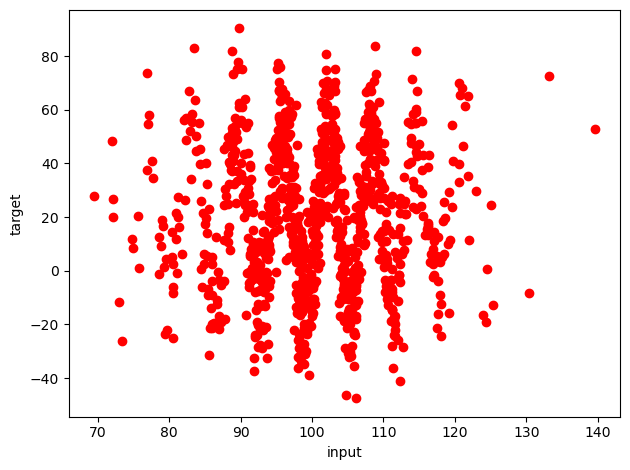

In [79]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

## Step 10: Fit the model

Fit the linear regression model to the dataset

In [80]:
lin_reg=LinearRegression()
_ = lin_reg.fit(np.sin(X),y)

# OR, we could combine the two lines above to one as follows...
#lin_reg = LinearRegression().fit(X,y)

## Step 11: Analyze the linear regression model's performance

Visualize the linear regression model results

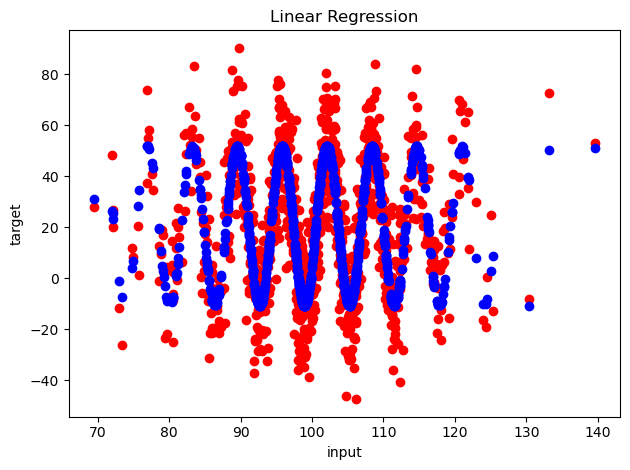

In [81]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg.predict(np.sin(X)),color='blue')

ax.set_title('Linear Regression')
ax.set_xlabel('input')
ax.set_ylabel('target')
plt.tight_layout()
plt.show()

In [82]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
r2 = lin_reg.score(X, y)
print(f"Y = {b0:.2f} + {b1:.2f}sin(x)")
print(f"R^2: {lin_reg.score(np.sin(X), y):.3f}") 
df.shape

Y = 20.44 + 31.28sin(x)
R^2: 0.674


(1000, 2)

## ANALYSIS

#### We have added more noise to the data, i.e changed the Standard deviation which describes the variation in data. After we use the new data for our regression model, the b0 and b1 values are 20.44 and 31.28 in comparision with 20.00 and 30.50 respectively.

#### We can clearly see that with increase in the noise, the regression model performs less effectively.